# Relatório Inflação entre 2000 e 2021

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))
import numpy as np

In [2]:
dados = pd.read_csv('mes_brasil.csv', sep = ',')

In [3]:
dados.head(10)

,ano,mes,indice,variacao_mensal,variacao_trimestral,variacao_semestral,variacao_anual,variacao_doze_meses
0,2000,5,1584.32,0.09,0.65,2.57,1.65,6.57
1,2000,6,1585.59,0.08,0.64,1.73,1.73,6.68
2,2000,7,1597.96,0.78,0.95,1.86,2.52,6.67
3,2000,8,1629.76,1.99,2.87,3.54,4.56,7.92
4,2000,9,1637.09,0.45,3.25,3.91,5.03,7.90
5,2000,10,1640.04,0.18,2.63,3.61,5.22,7.23
6,2000,11,1642.83,0.17,0.80,3.69,5.40,6.36
7,2000,12,1652.69,0.60,0.95,4.23,6.04,6.04
8,2001,1,1663.10,0.63,1.41,4.08,0.63,6.01
9,2001,2,1671.42,0.50,1.74,2.56,1.13,6.18


In [4]:
anos = list(range(2000, 2022))

In [5]:
nomes = []
for i in anos:
    nome = "ano_" + str(i)
    nomes.append(nome)

In [6]:
dic_anos = {}
for i in anos:
    selecao = dados['ano'] == i
    dic_anos[i] = dados[selecao]

In [7]:
# Arrumando index dos anos 
for i in anos:
    dic_anos[i].reset_index(inplace = True)
    dic_anos[i].drop(['index'], axis =1, inplace = True)

/home/mirian/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Pergunta1: Quais anos tiveram a maior e a menor inflação?

In [8]:
# como o ano 2000 só tem 7 meses cadastrados vamos fazer um tratamento especial pra esse ano
anos_sem_2000 = list(range(2001, 2022))

In [9]:
# Para responder essa pergunta vou subtrair os indices do mes de dezembro e janeiro para cada ano e plotar um gráfico de barras
dif_indices_por_ano = []
for i in anos_sem_2000:
    var = (dic_anos[i]['indice'][11] - dic_anos[i]['indice'][0]).round(2)
    dif_indices_por_ano.append(var)
dif_indices_por_ano

[113.75,
 201.97,
 156.82,
 149.86,
 122.22,
 60.91,
 98.49,
 144.46,
 107.38,
 155.86,
 181.26,
 170.84,
 175.12,
 216.08,
 389.94,
 249.04,
 123.15,
 167.45,
 181.06,
 183.17,
 523.38]

In [10]:
dif_indice_2000 = []
dif_indice_2000.append((dic_anos[2000]['indice'][6] - dic_anos[2000]['indice'][0]).round(2))
dif_indice_2000
dif_indices_completa_por_ano = dif_indice_2000 + dif_indices_por_ano


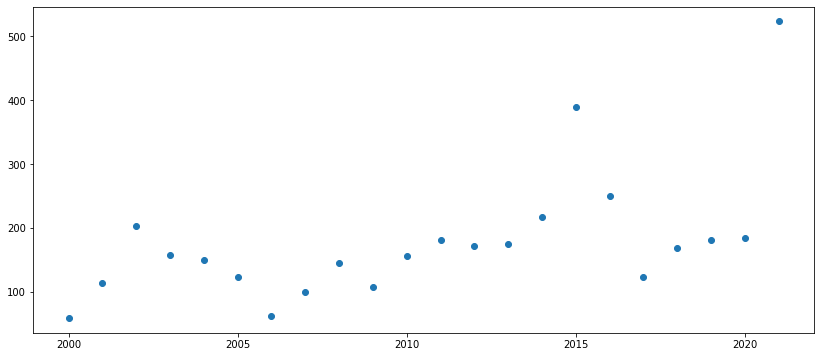

In [11]:
plt.scatter(x = anos, y = dif_indices_completa_por_ano)

(1999.0, 2022.0)

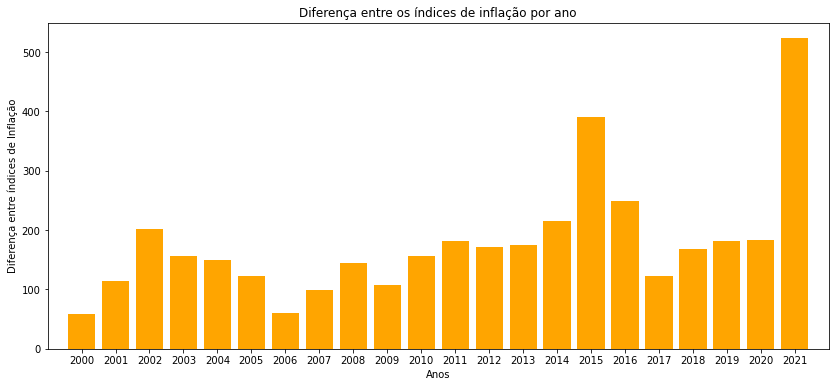

In [12]:
plt.bar(anos, dif_indices_completa_por_ano, color = 'orange', tick_label = anos)
plt.ylabel('Diferença entre índices de Inflação')
plt.xlabel('Anos')
plt.title('Diferença entre os índices de inflação por ano')
plt.xlim(1999, 2022)

In [13]:
# Fazendo o mesmo gráfico pelo variação anual
dic_anos[2021]

,ano,mes,indice,variacao_mensal,variacao_trimestral,variacao_semestral,variacao_anual,variacao_doze_meses
0,2021,1,5469.61,0.78,2.67,4.34,0.78,4.30
1,2021,2,5495.86,0.48,2.34,4.60,1.26,4.57
2,2021,3,5546.97,0.93,2.21,5.10,2.21,5.52
3,2021,4,5580.25,0.60,2.02,4.75,2.82,6.17
4,2021,5,5604.80,0.44,1.98,4.37,3.27,7.27
5,2021,6,5651.32,0.83,1.88,4.13,4.13,8.13
6,2021,7,5692.01,0.72,2.00,4.07,4.88,8.59
7,2021,8,5742.67,0.89,2.46,4.49,5.81,9.30
8,2021,9,5808.14,1.14,2.77,4.71,7.02,10.05
9,2021,10,5877.84,1.20,3.26,5.33,8.30,10.34


In [14]:
var_anual = [dic_anos[2000]['variacao_anual'][7]]
for i in anos_sem_2000:
    var_anual.append(dic_anos[i]['variacao_anual'][11])
var_anual


[6.04,
 7.51,
 11.99,
 9.86,
 7.54,
 5.88,
 2.96,
 4.36,
 6.1,
 4.18,
 5.79,
 6.56,
 5.78,
 5.85,
 6.46,
 10.71,
 6.58,
 2.94,
 3.86,
 3.91,
 4.23,
 10.42]

(1999.0, 2022.0)

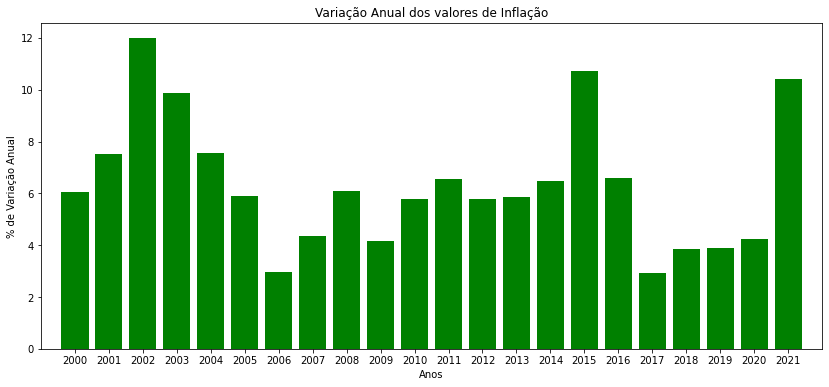

In [15]:
plt.bar(anos, var_anual, color = 'green', tick_label = anos)
plt.ylabel('% de Variação Anual')
plt.xlabel('Anos')
plt.title('Variação Anual dos valores de Inflação')
plt.xlim(1999, 2022)

## Qual o ano com maior e menor índice de inflação?
### RESPOSTA: Os anos com maiores índices de inflação foram 2002, 2015 e 2021
### Os anos com menores índices de inflação foram: 2016 e 2017

## Pergunta2: Houveram períodos de deflação?

In [17]:
meses = list(range(0,12))
meses

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [18]:
deflacao = []
for ano in anos_sem_2000:
    for mes in meses:
        var = dic_anos[ano]['variacao_mensal'][mes]
        if var <= 0:
            deflacao.append([ano, mes])
deflacao

[[2003, 6],
 [2006, 5],
 [2006, 6],
 [2010, 6],
 [2010, 7],
 [2017, 6],
 [2018, 11],
 [2020, 3],
 [2020, 4]]

In [19]:
df_deflacao = pd.DataFrame(deflacao)
df_deflacao

,0,1
0,2003,6
1,2006,5
2,2006,6
3,2010,6
4,2010,7
5,2017,6
6,2018,11
7,2020,3
8,2020,4


### RESPOSTA: Houveram 9 meses com defleção, como mostra o dataframe acima

## Pergunta 3: Quais meses mais colaboram para a inflação?

In [20]:
#meses_nomes = {0: [], 1:[] , 2:[], 3:'abr', 4:'mai', 5:'jun', 6:'jul', 7:'ago', 8:'set', 9:'out', 10: 'nov', 11:'dez'}
#for i in meses:
#    globals()[i] = []

In [21]:
# colocando os dados de variacao mensal de cada ano em uma lista com o nome do respectivo mes
jan = []
for ano in anos_sem_2000:
        var = dic_anos[ano]['variacao_mensal'][0]
        jan.append(var)

fev = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][1]
    fev.append(var)

mar = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][2]
    mar.append(var)
    
abr = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][3]
    abr.append(var)

mai = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][4]
    mai.append(var)
    
jun = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][5]
    jun.append(var)
    
jul = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][6]
    jul.append(var)

ago = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][7]
    ago.append(var)

sete = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][8]
    sete.append(var)

out = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][9]
    out.append(var)
    
nov = []
for ano in anos_sem_2000:
    var = dic_anos[ano]['variacao_mensal'][10]
    nov.append(var)
    
dez = []
for ano in anos_sem_2000:
        var = dic_anos[ano]['variacao_mensal'][11]
        dez.append(var)

In [22]:
area = plt.figure(figsize = (12,9), dpi = 100)


<Figure size 1200x900 with 0 Axes>

In [23]:
plot_jan = area.add_subplot(4,3,1)
plot_fev = area.add_subplot(4,3,2)
plot_mar = area.add_subplot(4,3,3)
plot_abr = area.add_subplot(4,3,4)
plot_mai = area.add_subplot(4,3,5)
plot_jun = area.add_subplot(4,3,6)
plot_jul = area.add_subplot(4,3,7)
plot_ago = area.add_subplot(4,3,8)
plot_sete = area.add_subplot(4,3,9)
plot_out = area.add_subplot(4,3,10)
plot_nov = area.add_subplot(4,3,11)
plot_dez = area.add_subplot(4,3,12)


In [27]:
plot_jan.bar(anos_sem_2000, jan, color = 'gold')
plot_jan.axis([1999, 2022, -1,2.5])
plot_jan.set_title("Janeiro", position = (0.5, -0.9))
plot_jan.get_xaxis().set_visible(False)

plot_fev.bar(anos_sem_2000, fev, color = 'orange')
plot_fev.axis([1999, 2022, -1,2.5])
plot_fev.set_title("Fevereiro", position = (0.5, -0.9))
plot_fev.get_xaxis().set_visible(False)

plot_mar.bar(anos_sem_2000, mar, color = 'pink')
plot_mar.axis([1999, 2022, -1,2.5])
plot_mar.set_title("Março", position = (0.5, -0.9))
plot_mar.get_xaxis().set_visible(False)

plot_abr.bar(anos_sem_2000, abr, color = 'red')
plot_abr.axis([1999, 2022, -1,2.5])
plot_abr.set_title("Abril", position = (0.5, 0.9))
plot_abr.get_xaxis().set_visible(False)

plot_mai.bar(anos_sem_2000, mai, color = 'coral')
plot_mai.axis([1999, 2022, -1,2.5])
plot_mai.set_title("Maio", position = (0.5, -0.9))
plot_mai.get_xaxis().set_visible(False)

plot_jun.bar(anos_sem_2000, jun, color = 'green')
plot_jun.axis([1999, 2022, -1,2.5])
plot_jun.set_title("Junho", position = (0.5, -0.9))
plot_jun.get_xaxis().set_visible(False)

plot_jul.bar(anos_sem_2000, jul, color = 'aqua')
plot_jul.axis([1999, 2022, -1,2.5])
plot_jul.set_title("Julho", position = (0.5, -0.9))
plot_jul.get_xaxis().set_visible(False)

plot_ago.bar(anos_sem_2000, ago, color = 'blue')
plot_ago.axis([1999, 2022, -1,2.5])
plot_ago.set_title("Agosto", position = (0.5, -0.9))
plot_ago.get_xaxis().set_visible(False)

plot_sete.bar(anos_sem_2000, sete, color = 'purple')
plot_sete.axis([1999, 2022, -1,2.5])
plot_sete.set_title("Setembro", position = (0.5, -0.9))
plot_sete.get_xaxis().set_visible(False)

plot_out.bar(anos_sem_2000, out, color = 'brown')
plot_out.axis([1999, 2022, -1,2.5])
plot_out.set_title("Outubro", position = (0.5, -0.9))

plot_nov.bar(anos_sem_2000, nov, color = 'gray')
plot_nov.axis([1999, 2022, -1,2.5])
plot_nov.set_title("Novembro", position = (0.5, -0.9))

plot_dez.bar(anos_sem_2000, dez, color = 'black')
plot_dez.axis([1999, 2022, -1,2.5])
plot_dez.set_title("Dezembro", position = (0.5, -0.9))


Text(0.5, 1.0, 'Dezembro')

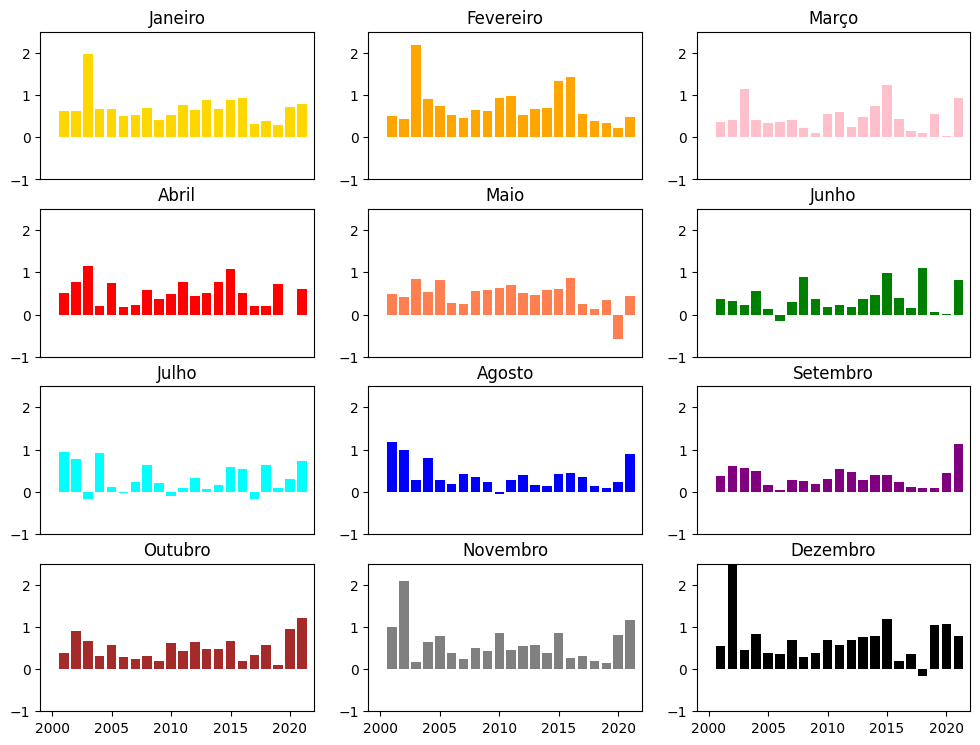

In [28]:
area

### RESPOSTA: Analisando os gráficos percebe-se que os meses de janeiro, feveiro e dezembro apresentam as maiores médias de inflação.
